#     COURSE: Linear algebra: theory and implementation
##    SECTION: Eigendecomposition

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Finding eigenvalues
---


(array([-1.,  6.]), array([[-0.92847669, -0.70710678],
       [ 0.37139068, -0.70710678]]))
[-1.  6.]


/Users/roy/miniconda3/envs/pytorch/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


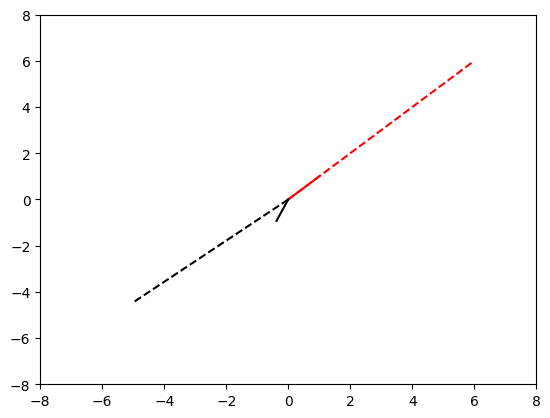

In [2]:
# matrix
A = [ [1,5], [2,4] ]
# A = [ [1,5], [2,3] ]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that the eigenvalues are in the first element of eigvals:
print(eigvals)
print(eigvals[0])

# specify two vectors
v1 = np.array([ 1,1 ])    # is an eigenvector for A = [[1, 5], [2, 4]]
v2 = np.random.randn(2,1) # unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2)# unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2

# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')  # v1 is scaled by A
plt.plot([0,v2[0]] ,[0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')  # v2 is rotated by A

plt.axis([-8,8,-8,8])
plt.show()

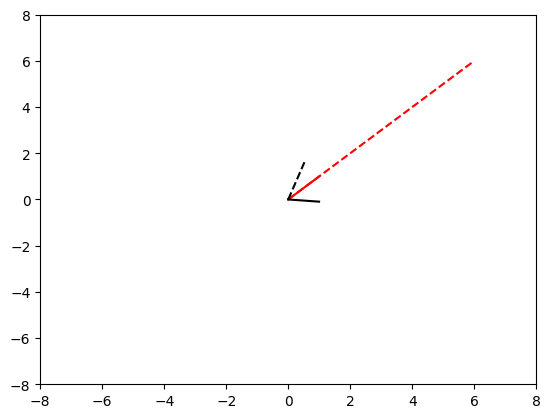

In [3]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])

[-3. -1.  3.]


### Code challenge: eigenvalues of diagonal and triangular matrices

In [7]:
# generate diagonal matrix (2x2), compute eigenvalues
A = np.diag([2, 1])
print(A)
print(np.linalg.eig(A)[0])

[[2 0]
 [0 1]]
[2. 1.]


In [8]:
# expand to NxN diagonal
A = np.diag(np.arange(3, 18))
print(A)
print(np.linalg.eig(A)[0])

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


In [10]:
# repeat with upper triangular 
A = np.triu(np.random.randn(4,4))
print(A)
print(np.linalg.eig(A)[0])

[[-0.64926184 -0.65531072 -0.39025039  0.26851434]
 [ 0.         -1.26027451  0.29368687  2.37245157]
 [ 0.          0.         -0.81267786  0.45370324]
 [ 0.          0.          0.          1.33578547]]
[-0.64926184 -1.26027451 -0.81267786  1.33578547]


In [11]:
# repeat with lower triangular 
A = np.tril(np.random.randn(4,4))
print(A)
print(np.linalg.eig(A)[0])  # the order is different

[[-0.89756155  0.          0.          0.        ]
 [-0.91070882 -0.06103458  0.          0.        ]
 [-0.29600015  1.19462331  0.3285173   0.        ]
 [-0.98434713  0.16266581 -0.83158607 -0.61178344]]
[-0.61178344  0.3285173  -0.06103458 -0.89756155]


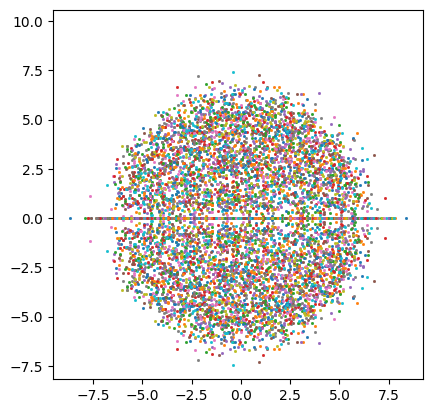

In [17]:
# Code Challenge: eigenvalues of random matrices

# generate 40x40 matrices, extract eigenvalues, plot them
# repeat lots of times in the same plot

for i in range(200):
    A = np.random.randn(40, 40)
    evals = np.linalg.eig(A)[0]
    plt.plot(np.real(evals), np.imag(evals), 's', markersize=1)

plt.axis('square')
plt.show()


---
# VIDEO: Finding eigenvectors
---


In [18]:
# matrix
A = [ [1,2], [2,1] ]

# eigenvectors (compare with code above)
# note also the differences with MATLAB: different order, evals in vector
evals, evecs = np.linalg.eig(A)  # or (L, W) or (D, V)
print(evals), print(' ')
print(evecs)  # python normalized the vector (i/sqrst(magnitude))

[ 3. -1.]
 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


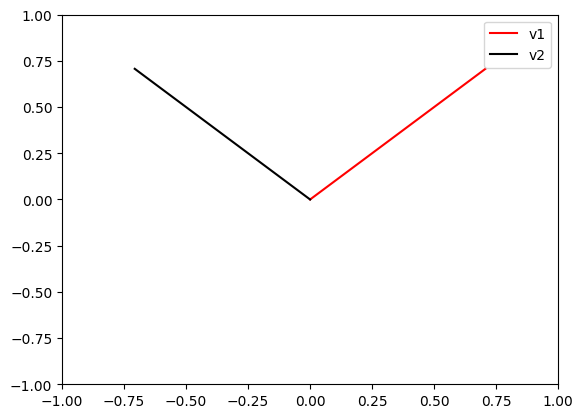

In [19]:
# compute the norm of each eigenvector
mag_v1 = np.sqrt( np.sum( np.square(evecs[:,0])) )
mag_v2 = np.sqrt( np.sum( np.square(evecs[:,1])) )
print(mag_v1,mag_v2)

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()


---
# VIDEO: Diagonalization
---


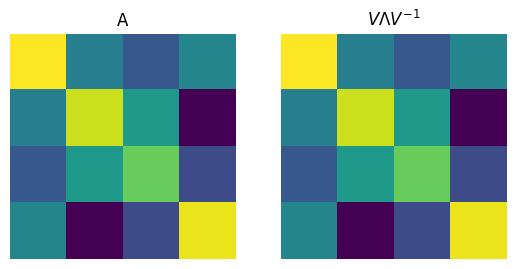

Reconstruction RMS: 2.0899481785832589e-13


In [20]:
## eigendecomposition of A

# make a symmetric matrix, a symmetric matrix has a real eigenvalues, not complex eigenvalues.
A = np.round(10*np.random.randn(4,4))
A = A.T@A

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)


# plot
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V\Lambda V^{-1}$')

plt.show()

# subtract the two (should be zero with rounding errors)
recondiff = A-Ap

# reconstruction error (note the numerical inaccuracies)
rmsA = np.sqrt( np.mean(np.square( np.reshape(recondiff,(1,-1)) )) )

print('Reconstruction RMS:', rmsA)


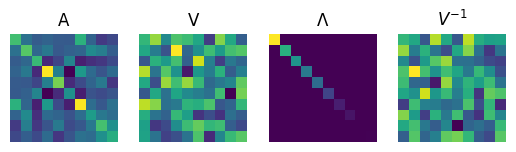

In [21]:
## diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

# eigendecomposition
D,V = np.linalg.eig(A)

# show the results
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()


---
# VIDEO: Matrix powers via diagonalization
---


In [3]:
## matrix powers

A = np.random.rand(2,2)

# compute matrix power directly
print( np.linalg.matrix_power(A,3) ) # A@A@A
print(' ')

# and via eigendecomposition
D,V = np.linalg.eig(A)
D = np.diag(D)

# reproduce via diagonalization
print(V @ np.linalg.matrix_power(D,3) @ np.linalg.inv(V) )

[[0.19616182 0.23800579]
 [0.43021046 0.24922134]]
 
[[0.19616182 0.23800579]
 [0.43021046 0.24922134]]


[[ 0.53354961  0.83781028 -0.11575292]
 [ 0.6924551  -0.5113049  -0.50899237]
 [ 0.48562408 -0.19141898  0.85295254]]
 
[[-0.53354961 -0.83781028 -0.11575292]
 [-0.6924551   0.5113049  -0.50899237]
 [-0.48562408  0.19141898  0.85295254]]


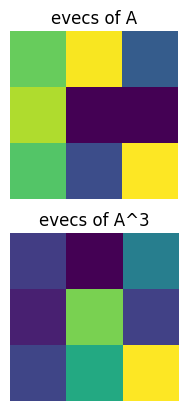

In [8]:
## eigenvalues of A and A^3

# create a symmetric matrix
A = np.random.rand(3,3)
A = A@A.T

D,V   = np.linalg.eig(A)
D3,V3 = np.linalg.eig( A@A@A )

print(V), print(' ')
print(V3)

plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(223)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A^3')

plt.show()

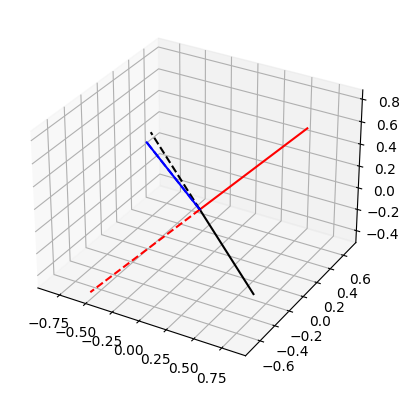

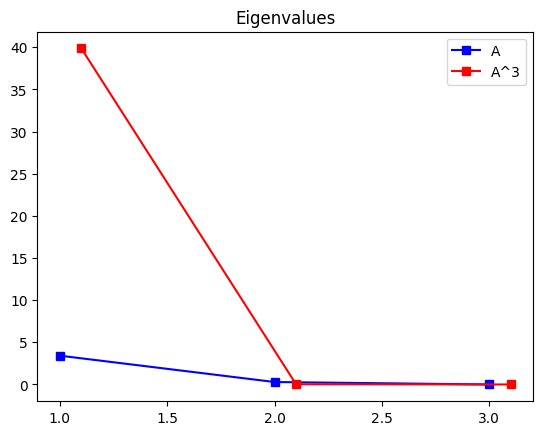

In [9]:
## plot the eigenvectors and eigenvalues

fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.subplot(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r')
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k')
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b')

# plot eigenvectors of A^3
ax.plot([0,V3[0,0]],[0,V3[1,0]],[0,V3[2,0]],'r--')
ax.plot([0,V3[0,1]],[0,V3[1,1]],[0,V3[2,1]],'k--')
ax.plot([0,V3[0,2]],[0,V3[1,2]],[0,V3[2,2]],'b--')

plt.show()

## show the eigenvalues
plt.plot([1,2,3],D,'bs-',label='A')
plt.plot([1.1,2.1,3.1],D3,'rs-',label='A^3')
plt.title('Eigenvalues')
plt.legend()
plt.show()

In [10]:
print(D), print(' ')
print(D3), print(' ')
print(D**3)

[3.41558087e+00 2.90353276e-01 2.00694705e-04]
 
[3.98468245e+01 2.44782402e-02 8.08323665e-12]
 
[3.98468245e+01 2.44782402e-02 8.08365448e-12]


### Code Challenge: edgendecomposition of matrix differences
$$(A-B)v = \lambda v$$
$$(A^2-AB-BA-B^2)v = \lambda^2 v$$

In [13]:
# Code Challenge: edgendecomposition of matrix differences

A = np.random.randn(5, 5)
A = A.T@A  # make it symmetric to avoid complex numbers

B = np.random.randn(5, 5)
B = B.T@B

D1, V1 = np.linalg.eig(A-B)
D2, V2 = np.linalg.eig(A@A - A@B - B@A + B@B)  # (A-B)^2

print(np.round(D1, 3))
print(np.round(D2, 3))
print(np.round(D1**2, 3))  # the order can be difference from D2

[-19.148  -5.993  10.889   0.918   4.3  ]
[366.663 118.565  35.913   0.844  18.492]
[366.663  35.913 118.565   0.844  18.492]


In [15]:
# sort eigenvalues
sidx1 = np.argsort(abs(D1))
sidx2 = np.argsort(D2)
print(sidx1)

V1 = V1[:, sidx1]
V2 = V2[:, sidx2]

np.round(V1-V2,3)

[3 4 1 2 0]


array([[ 0.572,  0.226,  0.305,  1.175,  0.821],
       [-0.152, -1.472,  0.946, -0.089,  0.063],
       [-0.703,  0.846,  0.678,  0.358, -1.271],
       [-0.268,  0.991,  0.654, -0.606,  1.164],
       [ 1.756,  0.289,  0.354, -0.34 , -0.593]])

In [16]:
print(np.round(V1, 2), '\n')
print(np.round(V2, 2))

[[ 0.29  0.11 -0.44  0.74  0.41]
 [-0.08 -0.74  0.52  0.43  0.03]
 [-0.35  0.42  0.16  0.52 -0.64]
 [-0.13  0.5   0.63  0.02  0.58]
 [ 0.88  0.14  0.35  0.01 -0.3 ]] 

[[-0.29 -0.11 -0.74 -0.44 -0.41]
 [ 0.08  0.74 -0.43  0.52 -0.03]
 [ 0.35 -0.42 -0.52  0.16  0.64]
 [ 0.13 -0.5  -0.02  0.63 -0.58]
 [-0.88 -0.14 -0.01  0.35  0.3 ]]



---
# VIDEO: Eigenvectors of repeated eigenvalues
---


In [ ]:
### Note about this cell: you need first to run the following cell,
#   then come back and run this one!

# a matrix
A = [ [ 5,  -1,  0], 
      [-1,   5,  0],
      [1/3,-1/3, 4] ]

# its eigendecomposition
D,V = np.linalg.eig(A)

# sort eigenvalues
i = np.argsort(D)
D = D[i]
V = V[:,i]


## plot eigenvectors
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
plt.legend()

# plot subspace spanned by same-eigenvalued eigenvectors
plot_plane(ax, V[:,0],V[:,1],size=3)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()


In [ ]:
# this code is copy-pasted with some light editing from:
# https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib

from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   ax = fig.gca(projection='3d')  
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='g'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .8)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

from mpl_toolkits.mplot3d import Axes3D


---
# Eigendecomposition of symmetric matrices
---


In [ ]:
# create a random matrix
A = np.random.randn(14,14)

# make it symmetric (additive method)
A = A+A.T

# diagonalize it
evals,evecs = np.linalg.eig(A)
print(evecs)
# magnitudes of each vector
print( np.sqrt( sum(evecs**2) ) )

In [ ]:
# and make plots
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()

plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()

plt.imshow(evecs@evecs.T)
plt.axis('off')
plt.title('VV^T')
plt.show()


---
# VIDEO: Generalized eigendecomposition
---


In [ ]:
import scipy.linalg # kindof annoying, but numpy doesn't do GED

# define matrices
A = np.array([ [3,2], [1,3]])
B = np.array([ [1,1], [4,1]])

# GED
eigvals,eigvecs = scipy.linalg.eig(A,B)


# matrix-vector multiplication
Av = A@eigvecs[:,1]
Bv = B@eigvecs[:,1]
BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Av[0]],[0,Av[1]],'r--',linewidth=2,label='$Av_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Av')
plt.show()

plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Bv[0]],[0,Bv[1]],'r--',linewidth=2,label='$Bv_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Bv')
plt.show()


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,BinvAv[0]],[0,BinvAv[1]],'r--',linewidth=2,label='B$^{-1}$Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('B$^{-1}$Av')
plt.show()

